In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from general_graph_utils_main import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Quick test of pipeline

In [3]:
G, G_ud = random_graph(n=10)

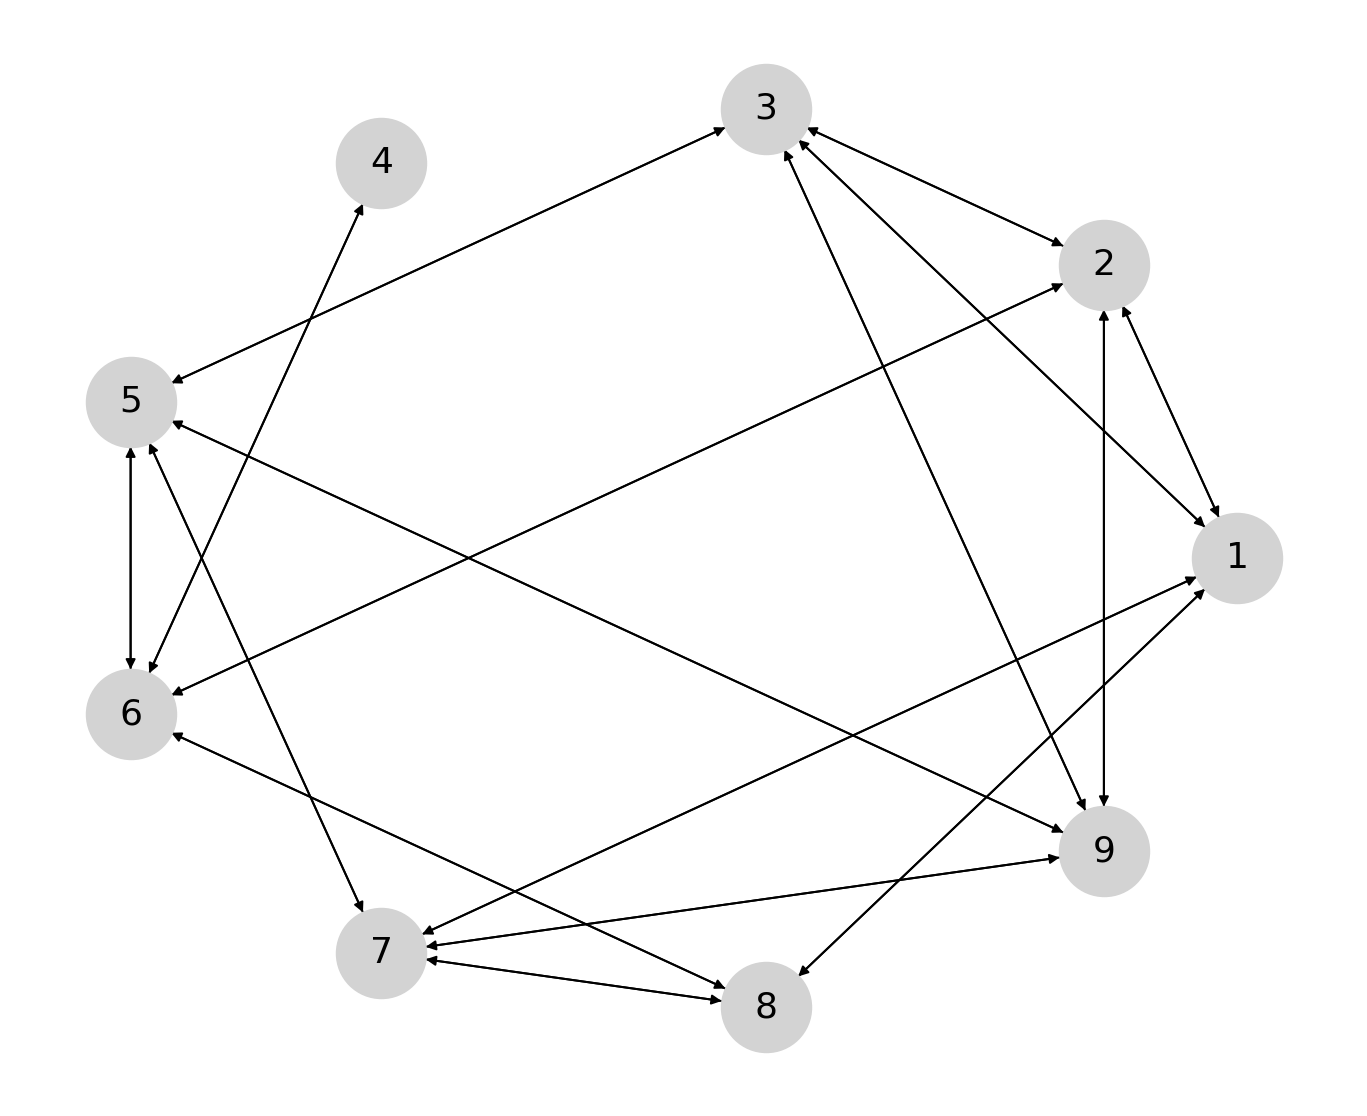

In [4]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [7]:
node_list = get_nodes(G)
num_nodes = len(node_list)

In [8]:
edge_list = get_edges(G)

In [9]:
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)

In [10]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 5): 0.00218, (1, 6): 0.9286, (1, 2): 17.04092, (2, 7): 7.63997, (2, 1): 0.19277, (2, 4): 765.07889, (2, 5): 0.00104, (2, 6): 0.02445, (3, 4): 0.16153, (3, 7): 0.48777, (4, 7): 0.0283, (4, 2): 0.02592, (4, 3): 0.004, (5, 7): 4.72599, (5, 1): 0.45401, (5, 2): 3.06238, (6, 2): 40.7118, (6, 7): 0.64038, (6, 1): 0.19879, (7, 3): 1.29112, (7, 5): 152.91326, (7, 2): 0.62722, (7, 6): 0.06655, (7, 4): 0.01636}
[2.1800000e-03 9.2860000e-01 1.7040920e+01 7.6399700e+00 1.9277000e-01
 7.6507889e+02 1.0400000e-03 2.4450000e-02 1.6153000e-01 4.8777000e-01
 2.8300000e-02 2.5920000e-02 4.0000000e-03 4.7259900e+00 4.5401000e-01
 3.0623800e+00 4.0711800e+01 6.4038000e-01 1.9879000e-01 1.2911200e+00
 1.5291326e+02 6.2722000e-01 6.6550000e-02 1.6360000e-02]


In [11]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [12]:
cycle_edges_backward

[[(6, 2), (1, 6), (2, 1)],
 [(7, 5), (6, 7), (1, 6), (5, 1)],
 [(7, 2), (6, 7), (2, 6)],
 [(4, 3), (7, 4), (3, 7)],
 [(4, 2), (7, 4), (2, 7)],
 [(5, 2), (1, 5), (2, 1)]]

In [13]:
cycle_edges_backward

[[(2, 6), (6, 1), (1, 2)],
 [(5, 7), (7, 6), (6, 1), (1, 5)],
 [(2, 7), (7, 6), (6, 2)],
 [(3, 4), (4, 7), (7, 3)],
 [(2, 4), (4, 7), (7, 2)],
 [(2, 5), (5, 1), (1, 2)]]

In [14]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ -4.4771971  -12.62112541   7.65338643   5.21984035   8.34089023
   1.83294241]


In [16]:
cycle_labels_forward, edge_tracker = equilibrium_params_2(cycle_list,cycle_edges_forward,shared_cycle_edges_list,all_cycle_edges_forward,cycle_labels_forward,products_f,products_b)

NameError: name 'shared_cycle_edges_list' is not defined

In [178]:
cycle_labels_forward

[[121.62467, 6.02408, 0.00078033073894363766324, 0.02049],
 [8.91989, 0.0012, 5555.8336713016082546],
 [0.00626, 3.1582, 0.0046764508656708455144]]

In [179]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-9.56808417e-17  4.91143584e-17  9.99634403e-17]


In [181]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

# Making new functions

In [42]:
N = 4

In [43]:
G, G_ud = random_graph_n(N)

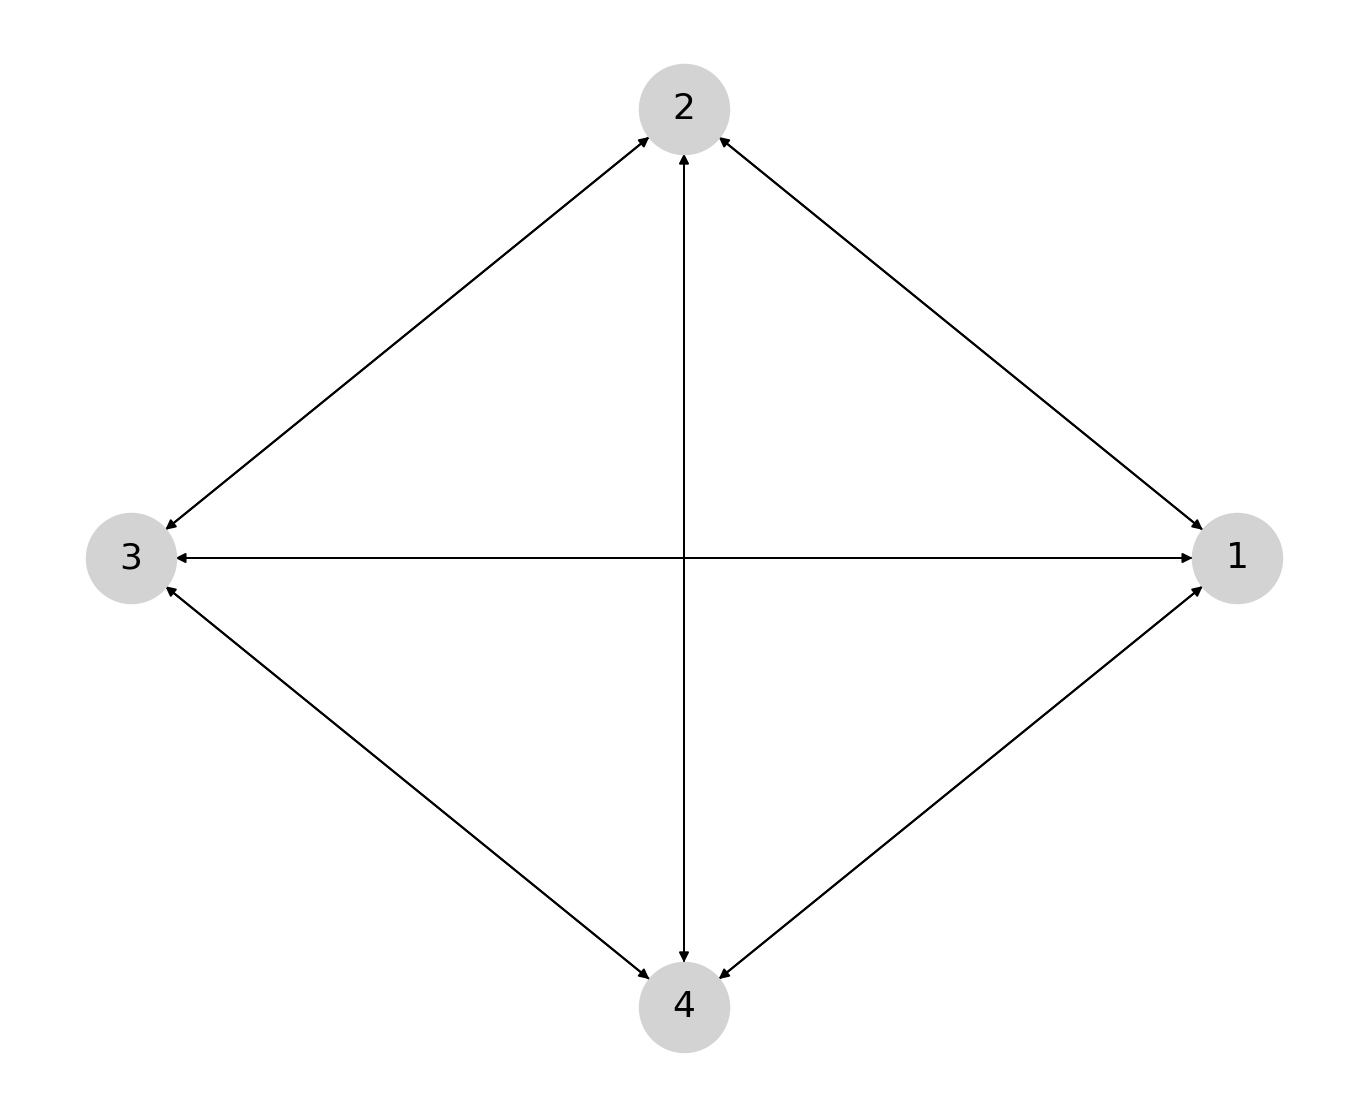

In [44]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [45]:
node_list = get_nodes(G)
num_nodes = N
edge_list = get_edges(G)
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)

In [46]:
cycle_list

[[4, 3, 1], [2, 3, 1], [4, 2, 1]]

In [47]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 2): 0.89387, (1, 3): 0.29406, (1, 4): 0.00163, (2, 4): 2.03046, (2, 1): 0.51678, (2, 3): 0.86868, (3, 4): 532.8662, (3, 2): 31.22178, (3, 1): 0.07851, (4, 1): 218.69547, (4, 2): 235.64675, (4, 3): 2.79275}
[8.9387000e-01 2.9406000e-01 1.6300000e-03 2.0304600e+00 5.1678000e-01
 8.6868000e-01 5.3286620e+02 3.1221780e+01 7.8510000e-02 2.1869547e+02
 2.3564675e+02 2.7927500e+00]


In [48]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [49]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-18.37865689  -4.35451111  -7.60072708]


In [50]:
def shared_edges_cycles(cycle_list, cycle_edges_forward, cycle_edges_backward):
    """
    Returns a list of all edges that are mutual to more than one cycle in G
    
    Parameters
    ----------
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
        
    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle
    
    cycle_edges_backward : list of lists
        each element is a list of the edges going around the opposite direction of a given cycle
        
    Returns
    ----------
    shared_cycle_edges_list : list
        list of all the pairs of reversible edges that are shared between at least 2 cycles in G
    
    all_cycle_edges_forward : list
        list of all the edge tuples that are recorded in cycle_edges_forward
    
    """
    all_cycle_edges = []
    all_cycle_edges_forward = []

    for i in range(len(cycle_list)):
        for j in range(len(cycle_list[i])):
            all_cycle_edges.append(cycle_edges_forward[i][j])
            all_cycle_edges.append(cycle_edges_backward[i][j])
            all_cycle_edges_forward.append(cycle_edges_forward[i][j])
    
    shared_cycle_edges_dict = Counter(all_cycle_edges)
    
    shared_cycle_edges_list = [edge for edge, count in shared_cycle_edges_dict.items() if count >= 2]
    
    return shared_cycle_edges_list,all_cycle_edges_forward

In [51]:
shared_cycle_edges_list,all_cycle_edges_forward = shared_edges_cycles(cycle_list,cycle_edges_forward,cycle_edges_backward)

In [52]:
print(cycle_list)

[[4, 3, 1], [2, 3, 1], [4, 2, 1]]


In [53]:
def equilibrium_params_2(cycle_list,cycle_edges_forward,shared_cycle_edges_list,cycle_labels_forward,products_f,products_b):
    """
    Sets the graph at thermodynamic equilibrium by back-calculating Kolmogorov's criterion and selecting edges that are not mutual to more than one cycle.
    
    Parameters
    ----------
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
        
    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle
    
    shared_cycle_edges_list : list
        list of all the pairs of reversible edges that are shared between at least 2 cycles in G
        
    cycle_labels_forward : list of lists
        each element is a list of the labels going around one direction of a given cycle
    
    products_f : 1D array
        each element is the product of labels corresponding to the forward traversal of each cycle
    
    products_b : 1D array
        each element is the product of labels corresponding to the backward traversal of each cycle
        
    Returns
    -------
    
    cycle_labels_forward : list of lists
        updated cycle_labels_forward with new edge labels
        
    edge_tracker: list
        list of edges with altered labels
        
    index_tracker: list
        list of second indices of altered edges in cycle_labels_forward
    
    """
    num_cycles = len(cycle_list)
    # tracking edges that have had their values altered
    edge_tracker = []
    index_tracker = []
    # count the cycles that have been initialized at equilibrium
    cycles_done = -1
    
    # remove all shared edges from cycle_edges_forward
    a = set(all_cycle_edges_forward)
    b = set(shared_cycle_edges_list)
    new_cycle_edges_forward = list(a.difference(b))        
    
    for i in range(num_cycles):
        
        while cycles_done < i:
            # choose a random edge in the "forward" direction
            j = np.random.randint(len(cycle_list[i]),size=1)[0]
            edge = cycle_edges_forward[i][j]
            edge_label = cycle_labels_forward[i][j]
            
            # if the edge is not shared with other cycles, recalculate its value
            if ((edge in new_cycle_edges_forward)==True):
                #print(j)
                # recalculate edge label using the cycle condition
                edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
                cycle_labels_forward[i][j] = edge_label
                # add that edge to edge_tracker
                edge_tracker.append(cycle_edges_forward[i][j])
                index_tracker.append(j)
                cycles_done += 1
            else:
                continue
            
    return cycle_labels_forward, edge_tracker, index_tracker

In [54]:
cycle_labels_forward, edge_tracker, index_tracker = equilibrium_params_2(cycle_list,cycle_edges_forward,shared_cycle_edges_list,cycle_labels_forward,products_f,products_b)

In [55]:
edge_tracker

[(4, 3), (2, 3), (4, 2)]

In [56]:
index_tracker

[0, 0, 0]

In [57]:
def reformat_labels(cycle_list, cycle_edges_forward, cycle_labels_forward, edge_tracker, index_tracker, label_dict, label_list):
    """
    Changes the parameterization of a NetworkX graph object from its initial parameterization
    
    Parameters
    ----------
    
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
    
    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle
    
    cycle_labels_forward : list of lists
        updated with new values for certain edges
        
    edge_tracker : list of lists
        list of edges with labels that were changed to initialize the system in an equilibrium steady state
    
    index_tracker: list
        list of second indices of altered edges in cycle_labels_forward
        
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels
        
    label_list : 1D numpy array
        list of edge labels in G
    
    Returns
    -------
    
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels (updated)
        
    label_list : 1D numpy array
        list of edge labels in G (updated)
    """
    
    num_cycles = len(cycle_list)
    
    for i in range(num_cycles):
        #print(cycle_edges_forward[i][index_tracker[i]])
        label_dict[edge_tracker[i]] = cycle_labels_forward[i][index_tracker[i]]
        
    label_list = np.fromiter(label_dict.values(), dtype=float)
    
    return label_dict, label_list

In [58]:
label_dict, label_list = reformat_labels(cycle_list, cycle_edges_forward, cycle_labels_forward, edge_tracker, index_tracker, label_dict, label_list)

In [59]:
edge_tracker

[(4, 3), (2, 3), (4, 2)]

In [60]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-3.67002435e-17 -7.79541362e-17  4.31512465e-17]


If the affinity is < 2e-16, we will count it as 0.

In [61]:
L = Laplacian_all(edge_list,label_list,node_list)

In [62]:
print(L)

[[-2.19290760e+02  8.93870000e-01  2.94060000e-01  1.63000000e-03]
 [ 5.16780000e-01 -4.71242969e+05  6.76082930e+01  2.03046000e+00]
 [ 7.85100000e-02  3.12217800e+01 -2.67782038e+08  5.32866200e+02]
 [ 2.18695470e+02  4.71210854e+05  2.67781970e+08 -5.34898290e+02]]


In [63]:
pi_all = steady_state_spectrum(L)

In [64]:
pi_all

array([7.45318403e-06, 4.30896712e-06, 1.98989825e-06, 9.99986248e-01])